nft-events-reader
nft-events-reader/block_counter.csv


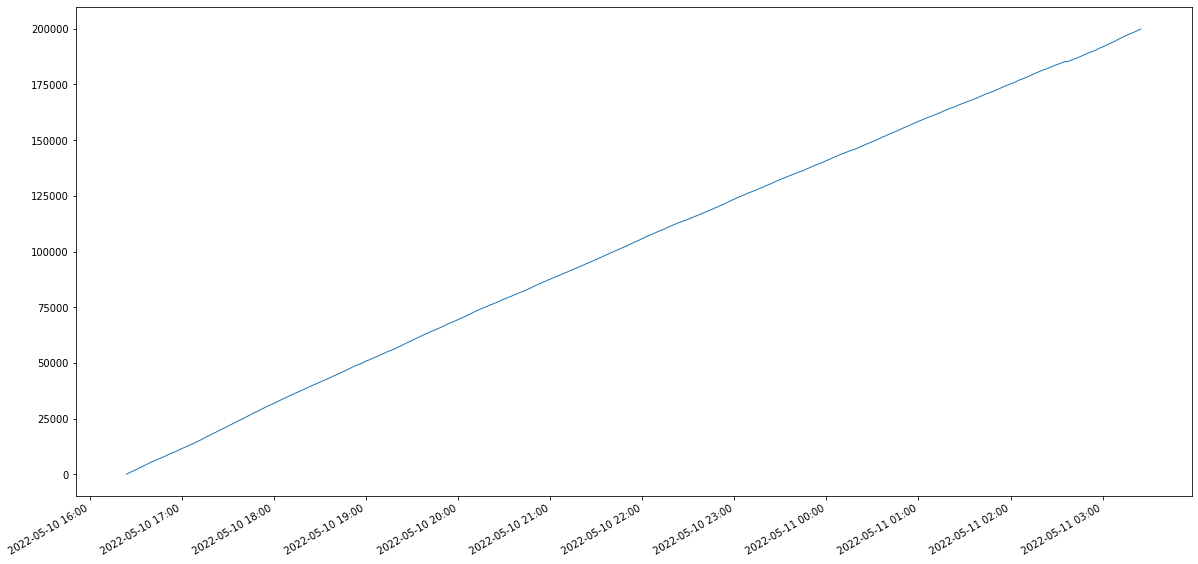

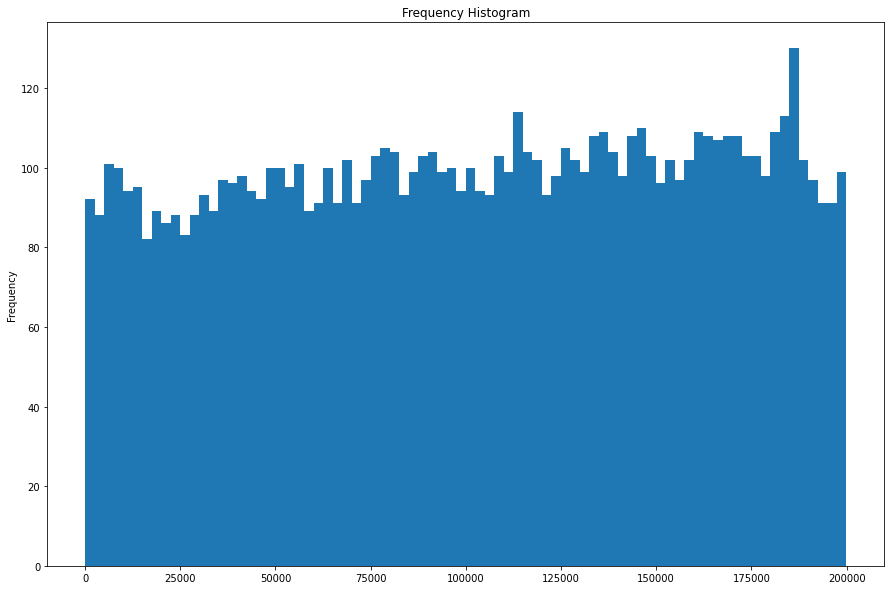

min: 30.0
max: 199890.0
median: 104010.0
average: 102530.52492113564
percentile: 189473.99999999997

nft-events-reader/fetch_events_gauge.csv


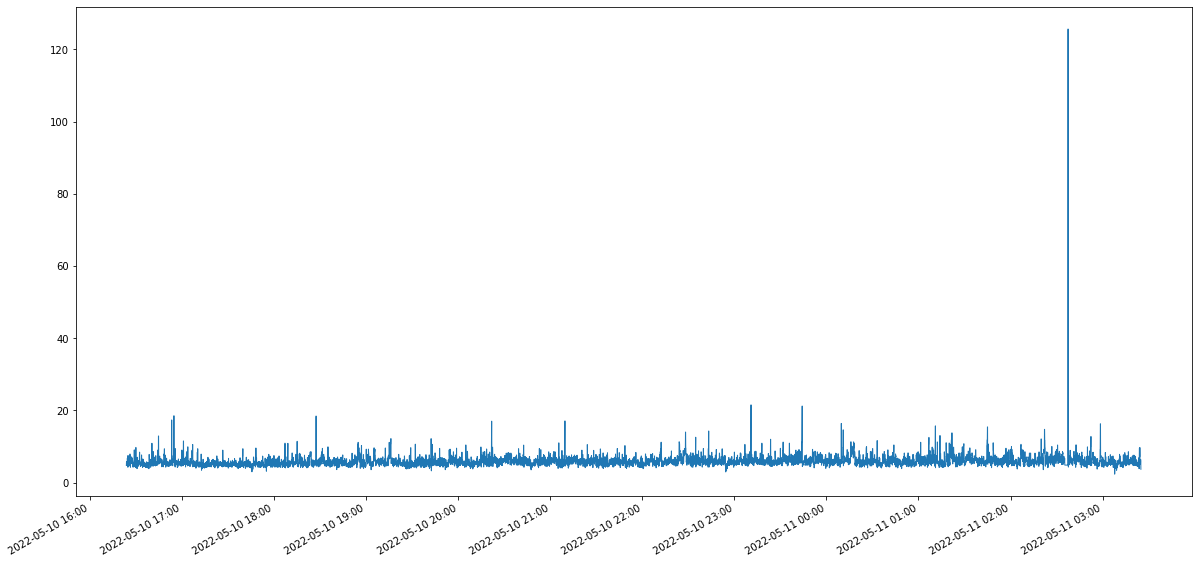

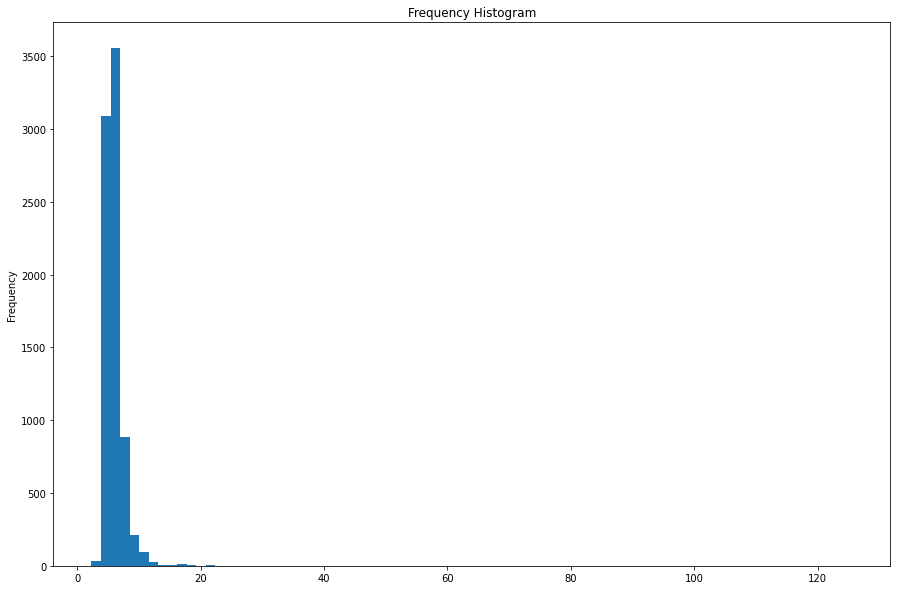

min: 2.323760096
max: 125.65595451
median: 5.630062758
average: 5.969046739960757
percentile: 8.375487098

nft-events-reader/total_events_gauge.csv


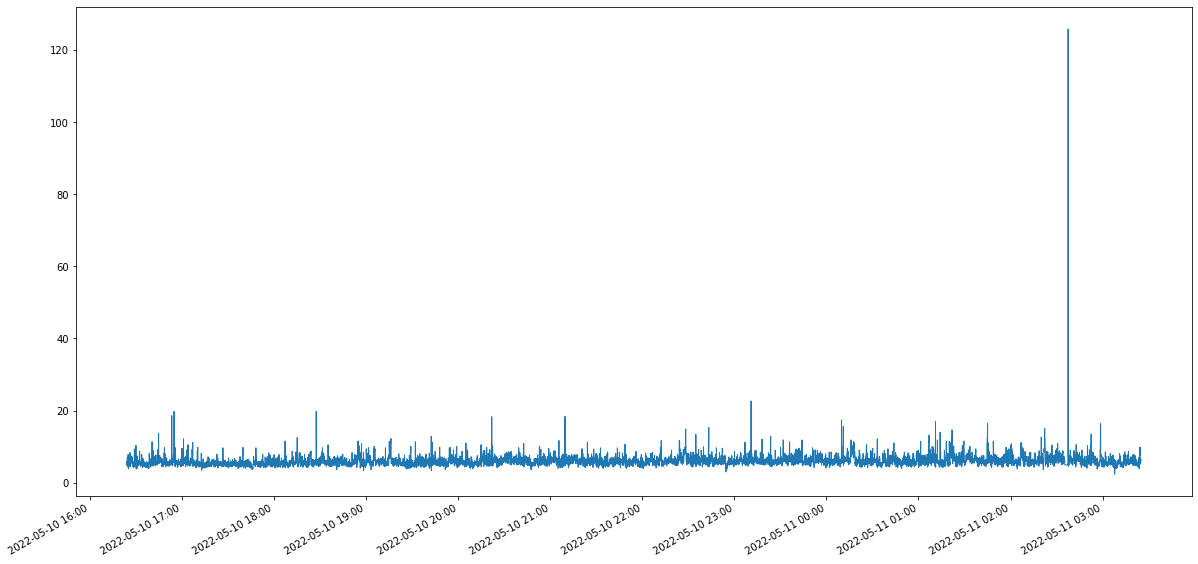

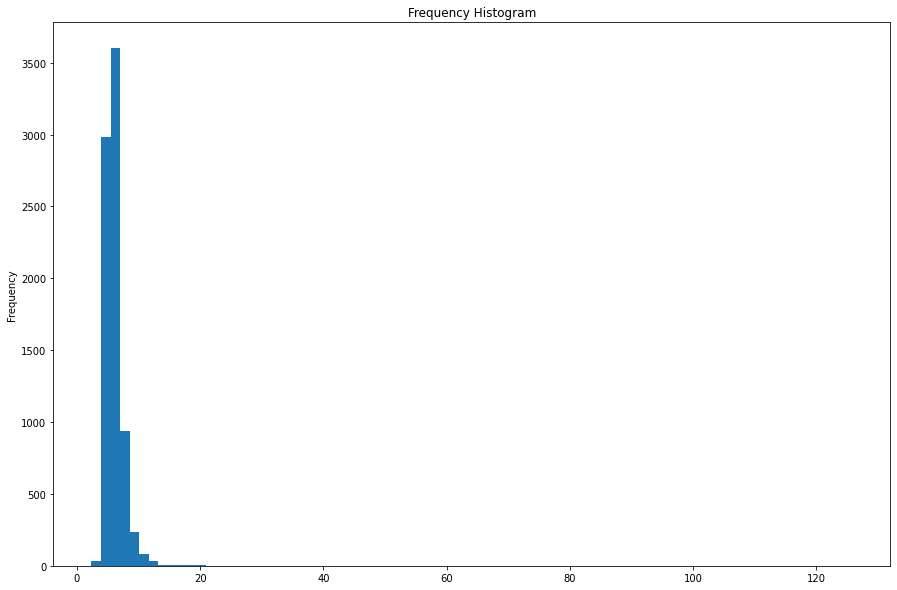

min: 2.359971068
max: 125.826021522
median: 5.707146603
average: 6.023983212591546
percentile: 8.461820475799998

ETH estimation for AVG(days): 34.86101396175663
ETH estimation for 95p(days): 48.968868494212956

nft-indexer
nft-indexer/block_counter.csv


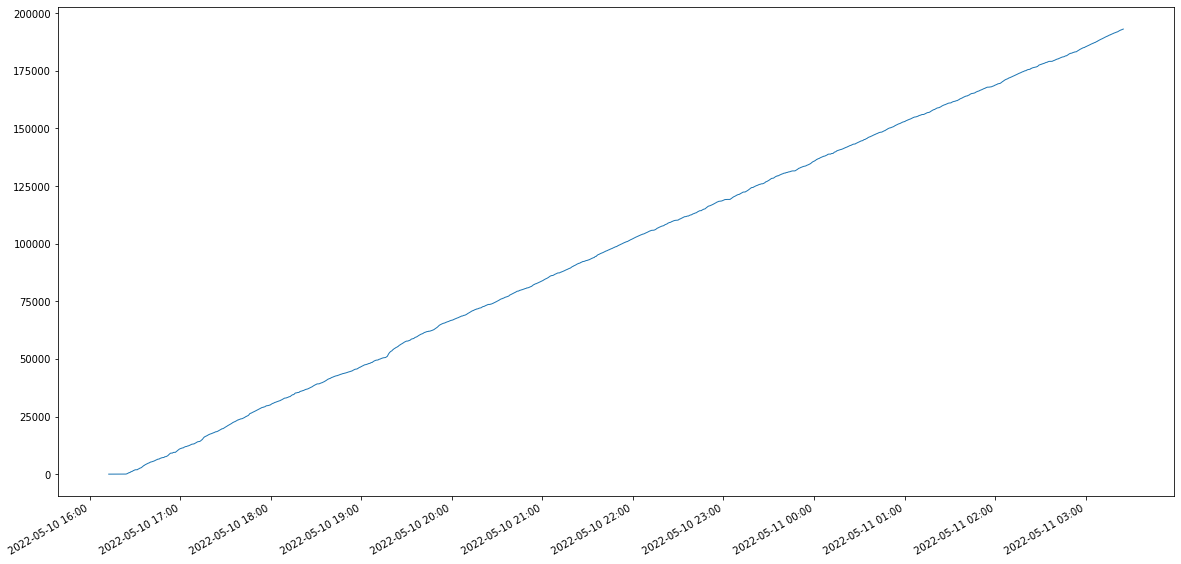

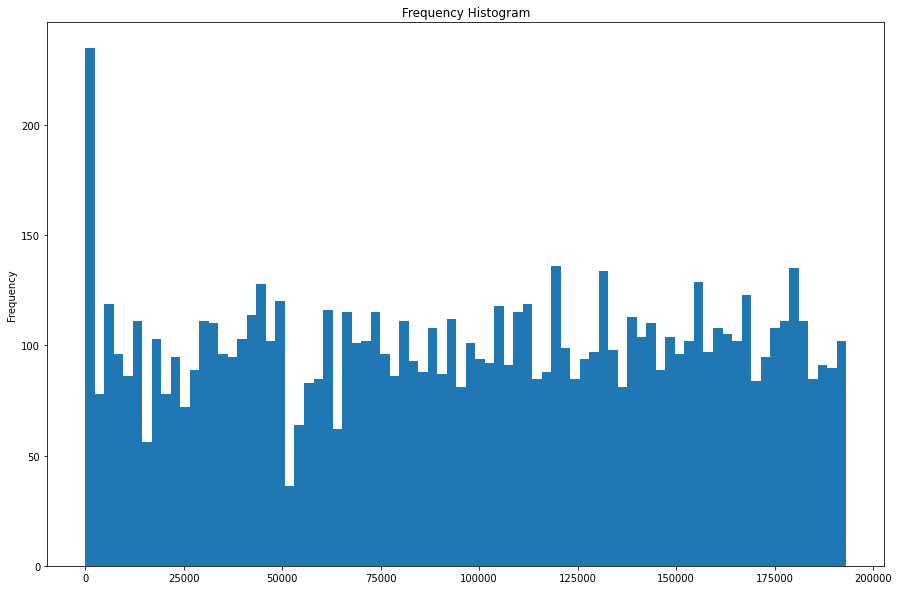

min: 29.0
max: 193140.0
median: 98745.0
average: 97073.65504405013
percentile: 182876.9

nft-indexer/processed_block_gauge.csv


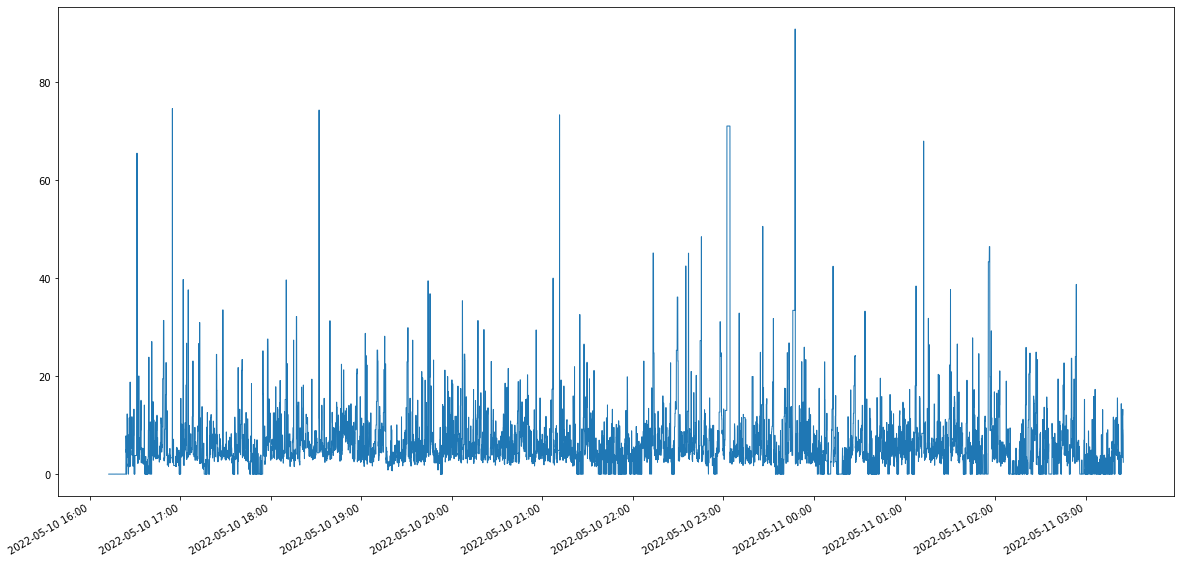

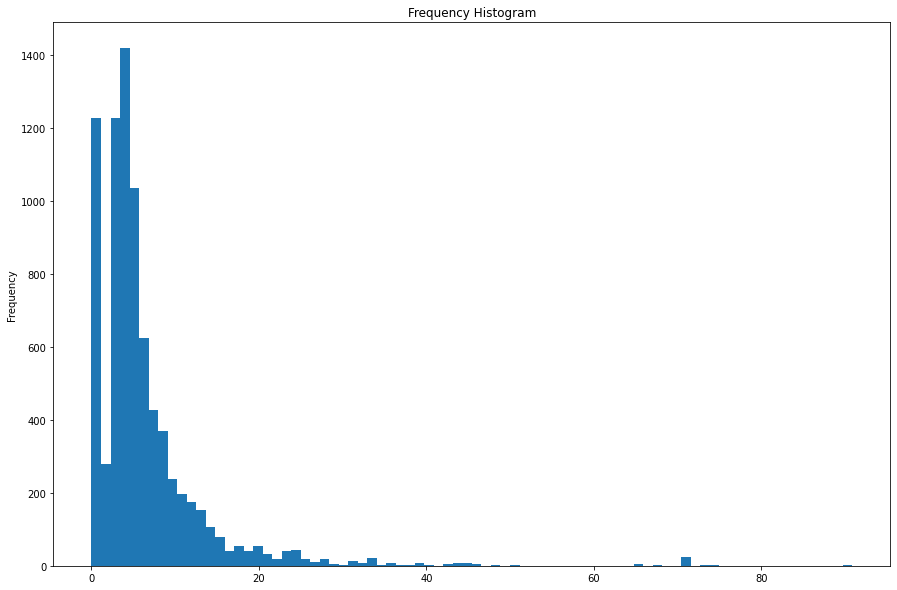

min: 0.001712572
max: 90.894657175
median: 4.430148011
average: 6.244798321365836
percentile: 18.210721319

nft-indexer/fetch_events_gauge.csv


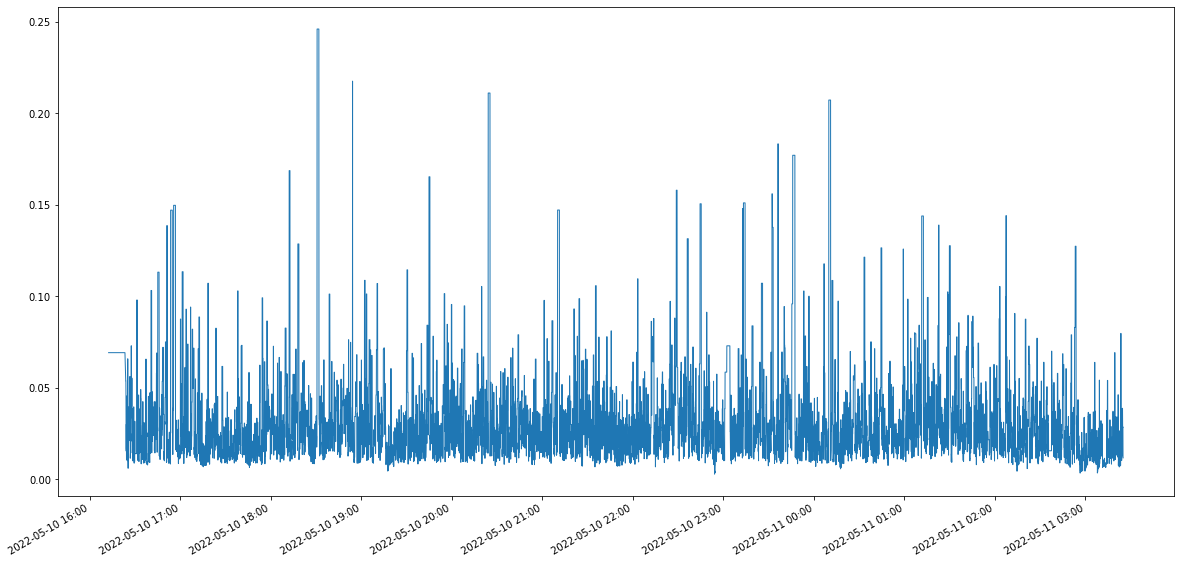

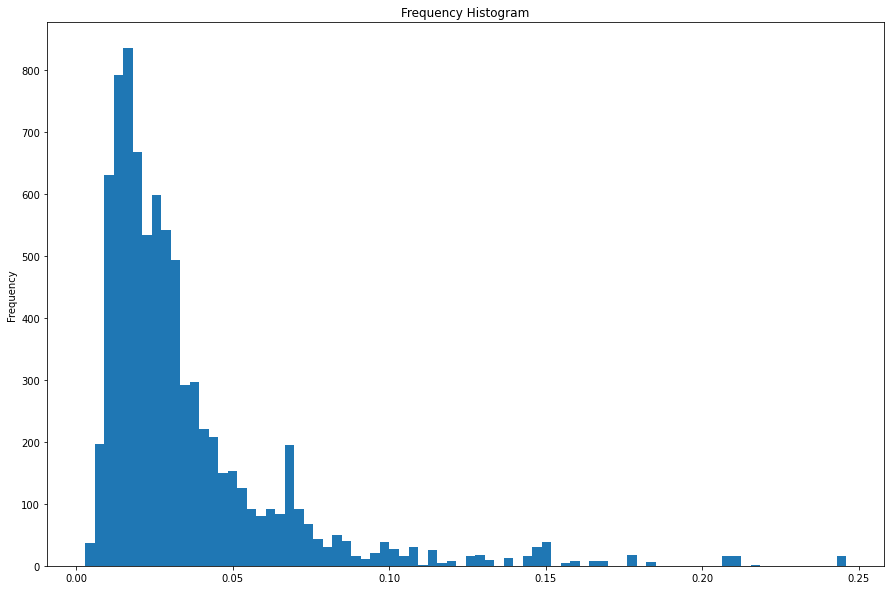

min: 0.002779356
max: 0.245910932
median: 0.025585352999999998
average: 0.03500235653435872
percentile: 0.09429520044999996

nft-indexer/tokens_gauge.csv


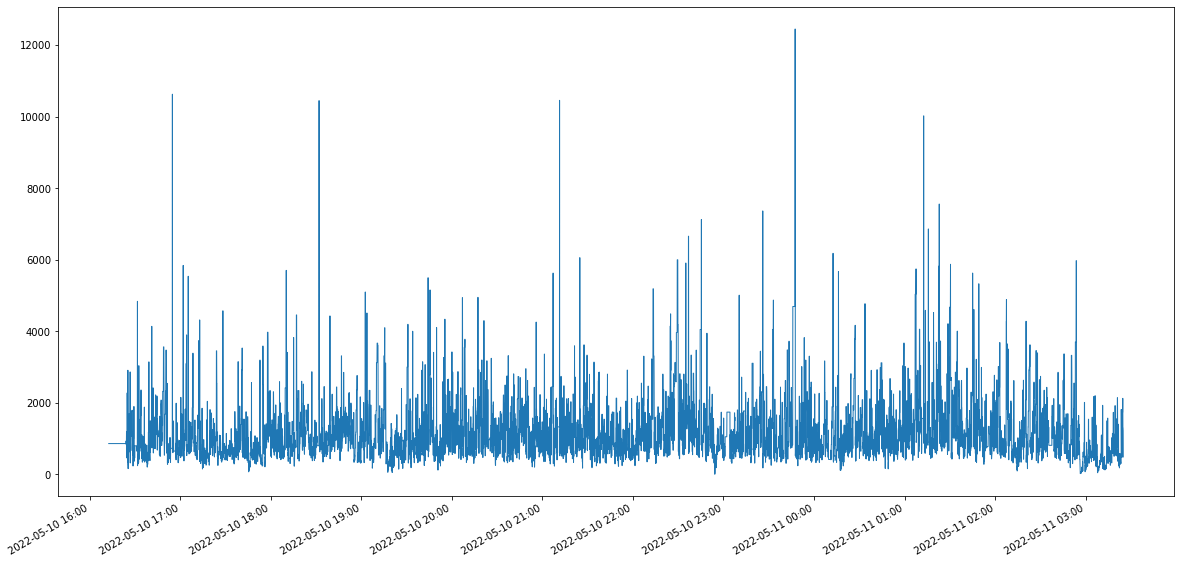

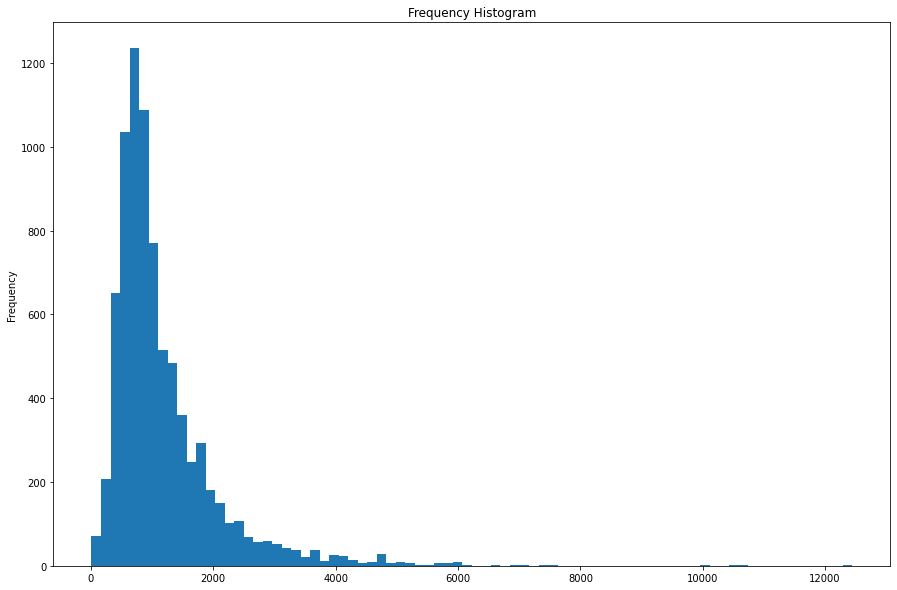

min: 9.0
max: 12446.0
median: 893.0
average: 1165.8559374612234
percentile: 2868.0

nft-indexer/fetch_uri_gauge.csv


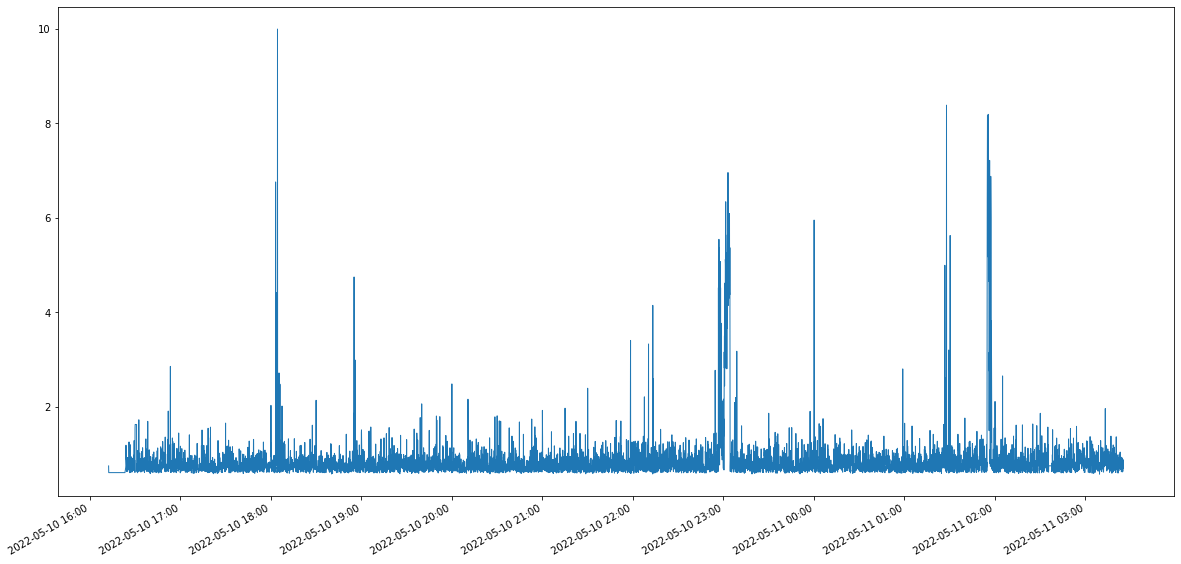

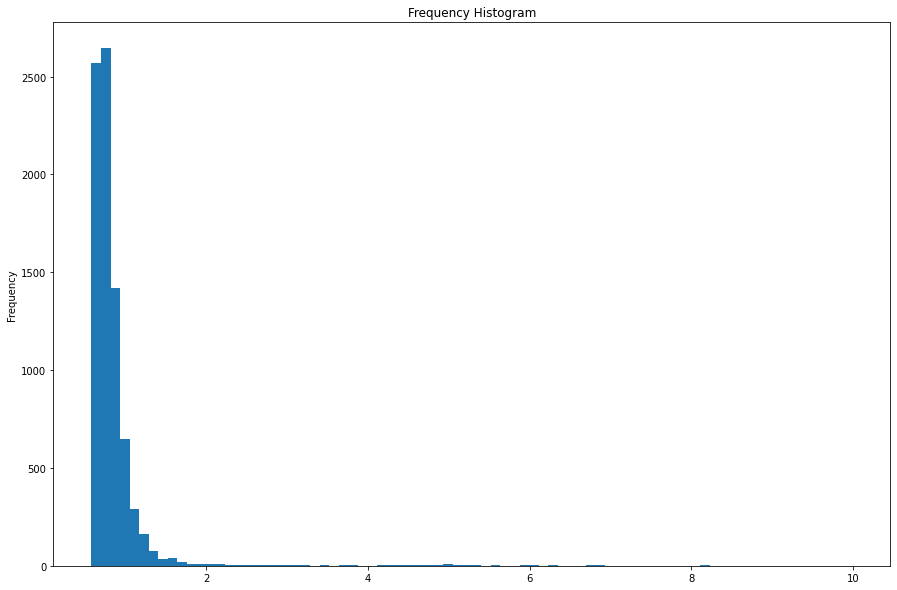

min: 0.582360733
max: 9.99331645
median: 0.758365962
average: 0.8575091308553708
percentile: 1.2174855979499999

nft-indexer/stored_erc721_token_counter.csv


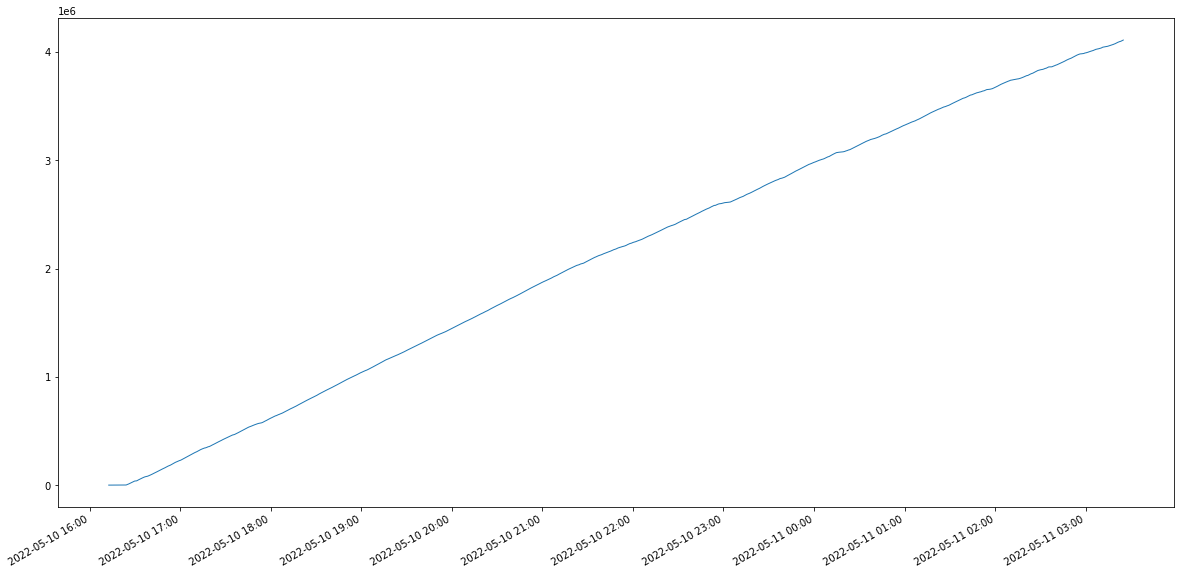

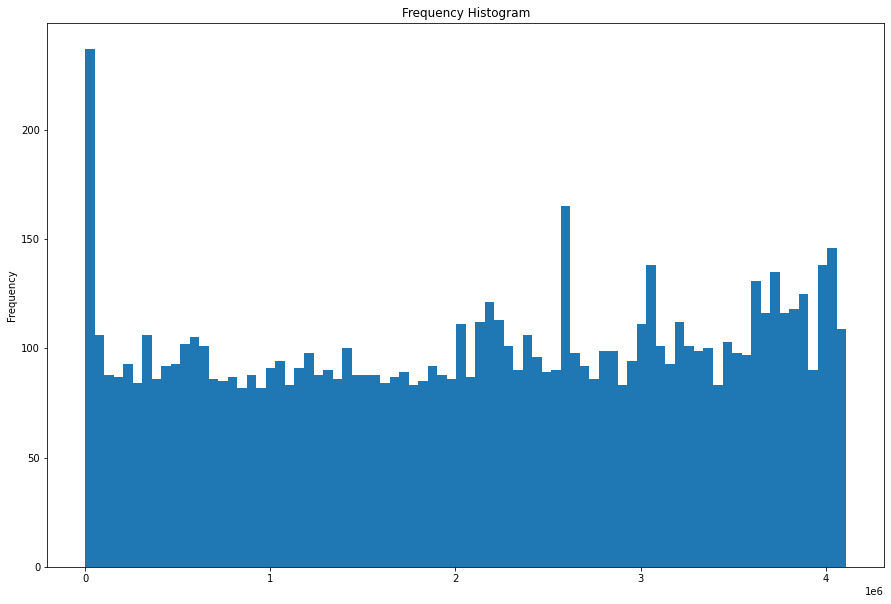

min: 94.0
max: 4110510.0
median: 2181972.0
average: 2113786.9015010544
percentile: 3949839.0

nft-indexer/stored_erc1155_token_counter.csv


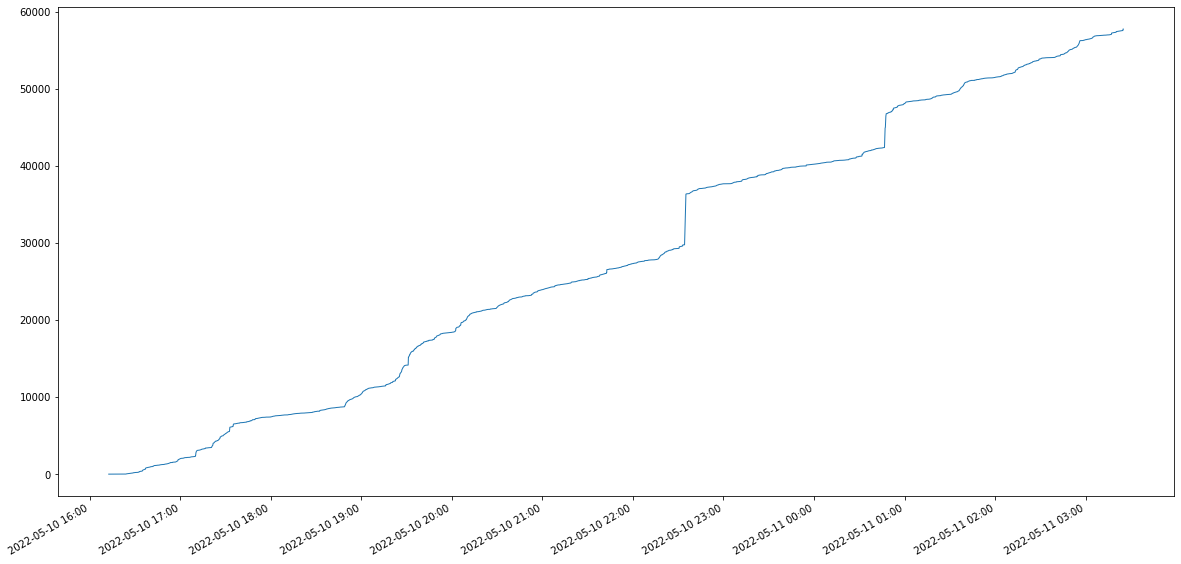

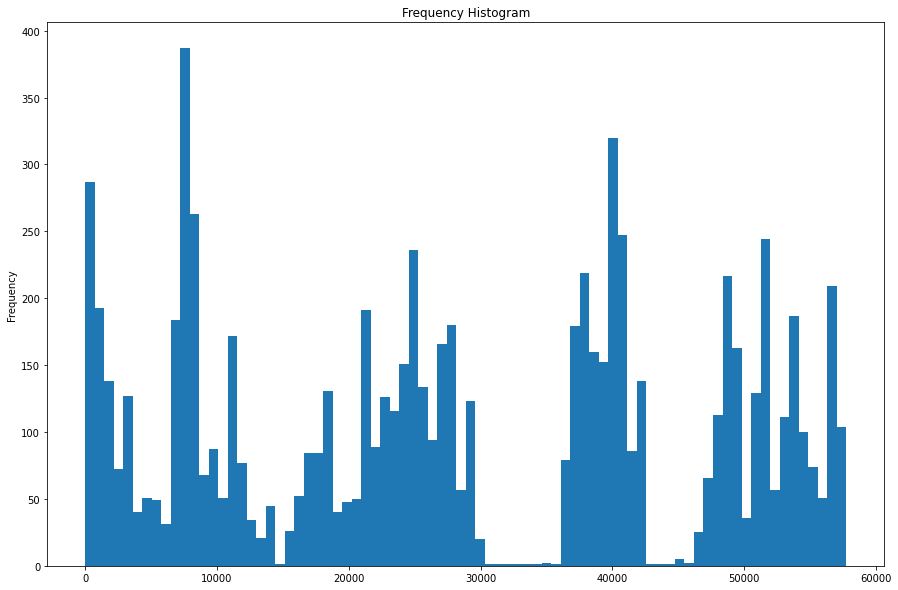

min: 4.0
max: 57732.0
median: 26713.0
average: 28233.46433444982
percentile: 55173.0

ETH estimation for AVG(days): 36.1388791745708
ETH estimation for 95p(days): 105.38611874421296

nft-metadata-reader
nft-metadata-reader/token_counter.csv


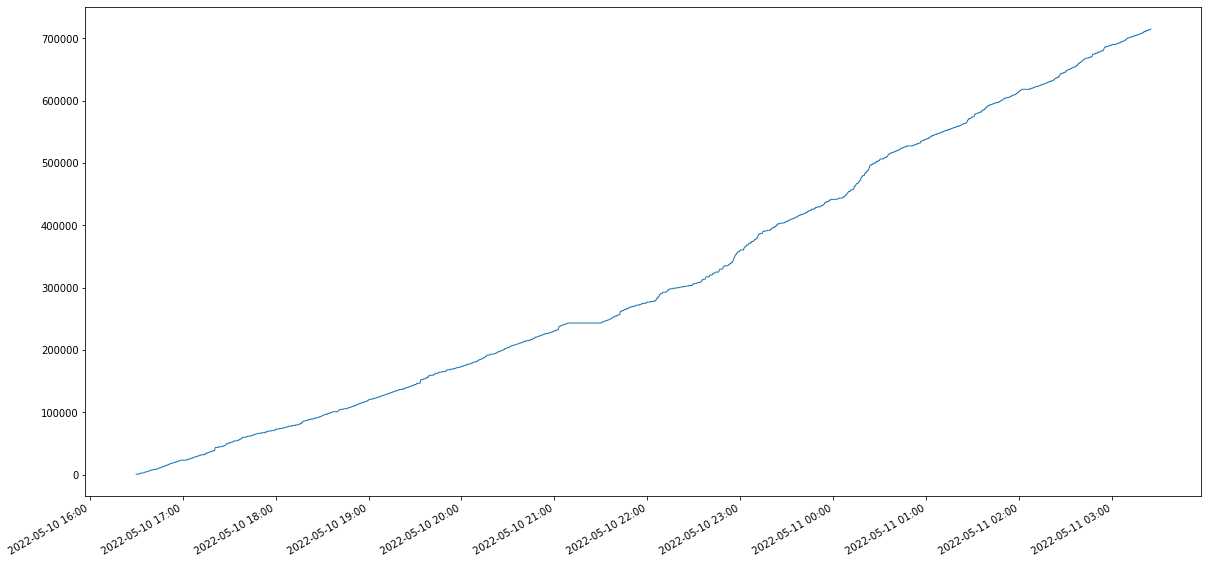

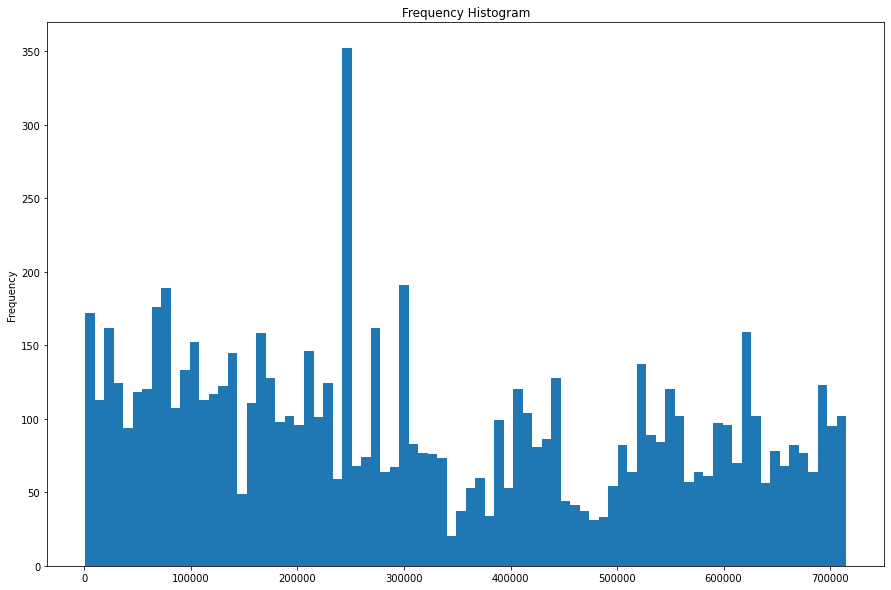

min: 755.0
max: 715118.0
median: 274898.0
average: 318509.42913486005
percentile: 679248.0

nft-metadata-reader/metadata_counter.csv


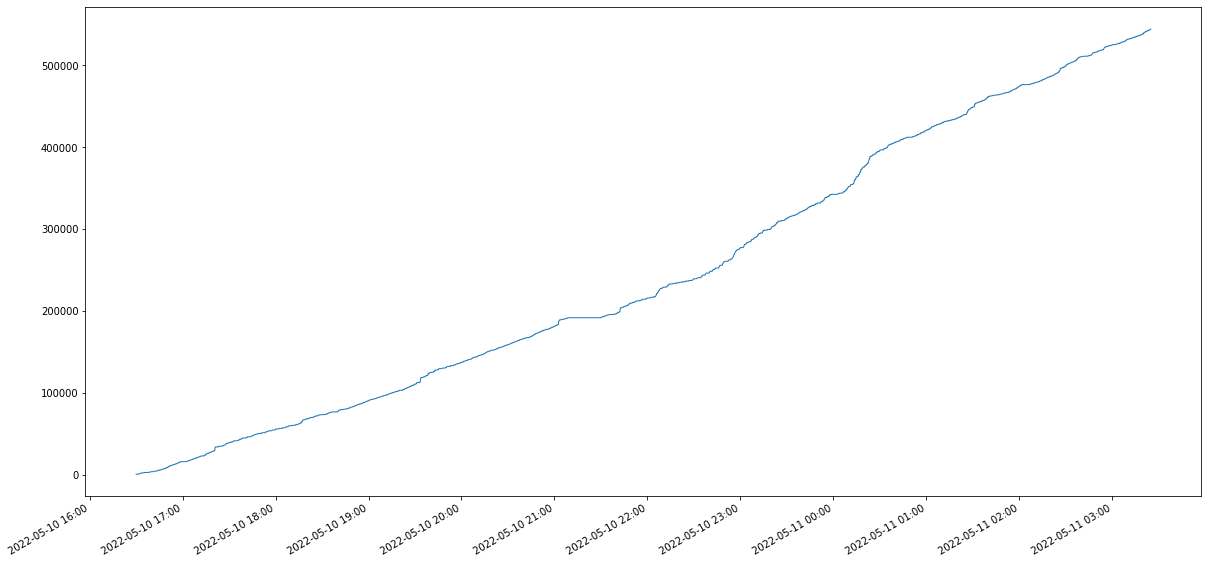

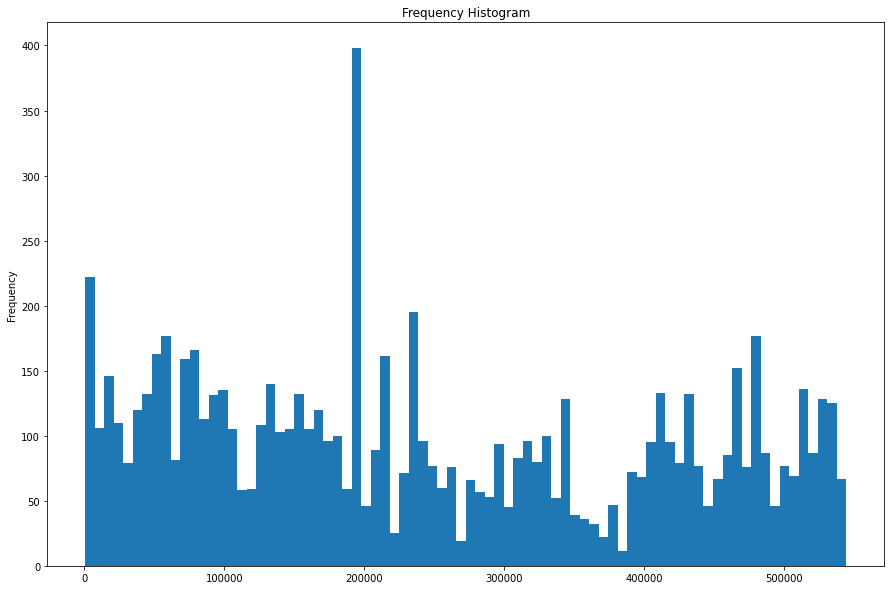

min: 603.0
max: 544406.0
median: 214317.5
average: 246450.0312977099
percentile: 518256.85

nft-metadata-reader/http_metadata_count.csv


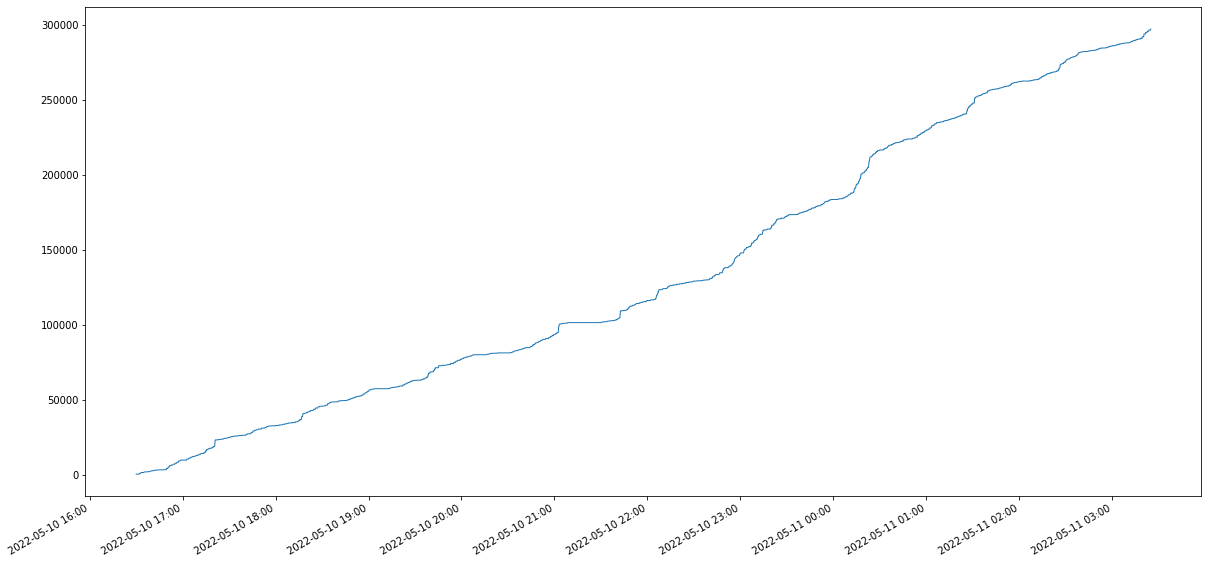

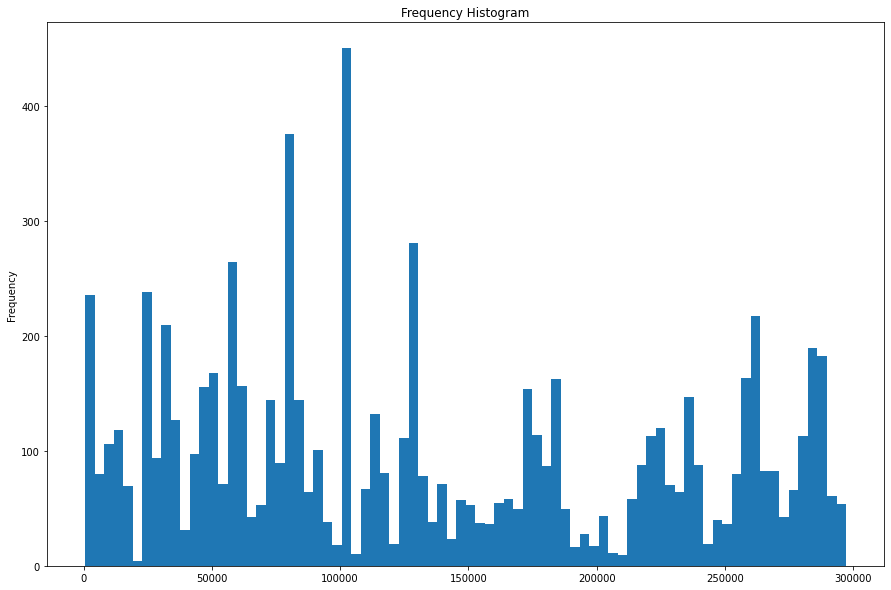

min: 514.0
max: 297302.0
median: 115467.0
average: 134872.5276081425
percentile: 284499.85

nft-metadata-reader/http_metadata_gauge.csv


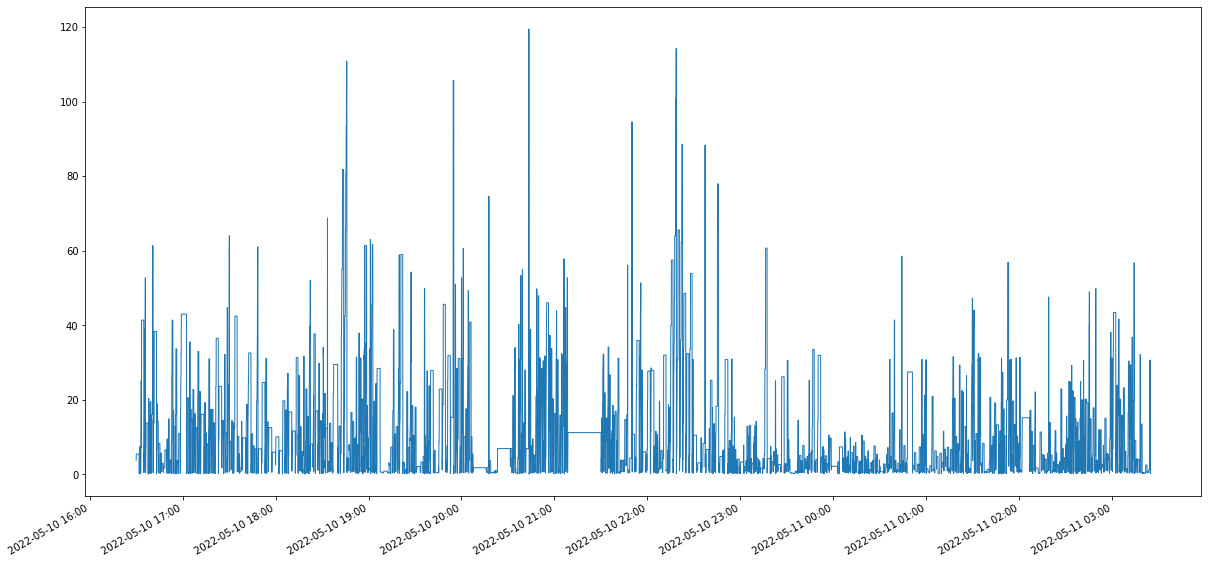

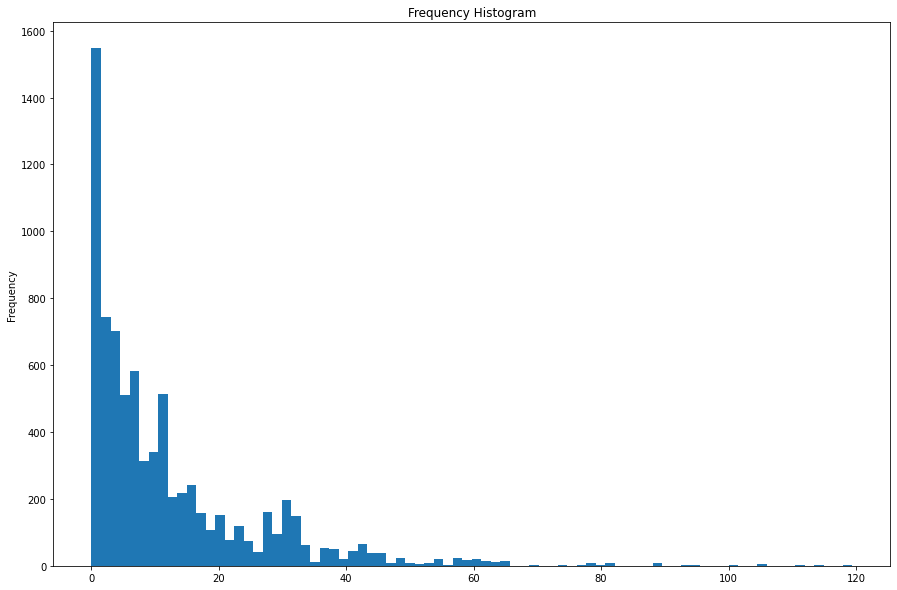

min: 0.045867721
max: 119.435819569
median: 6.900671245
average: 12.215410641170484
percentile: 41.360150699

nft-metadata-reader/ipfs_metadata_count.csv


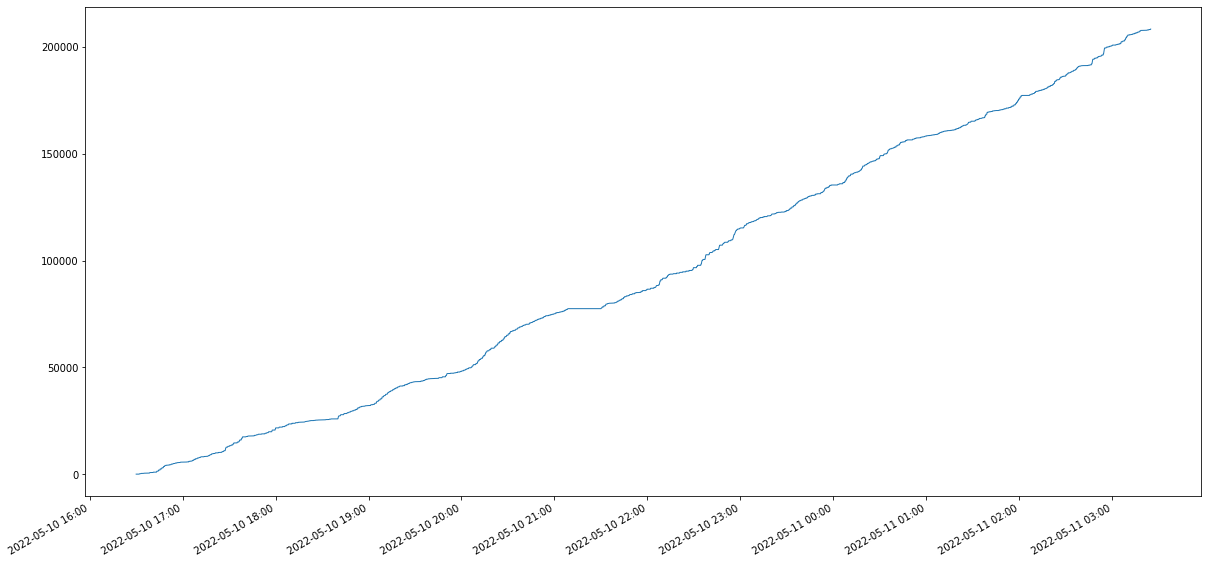

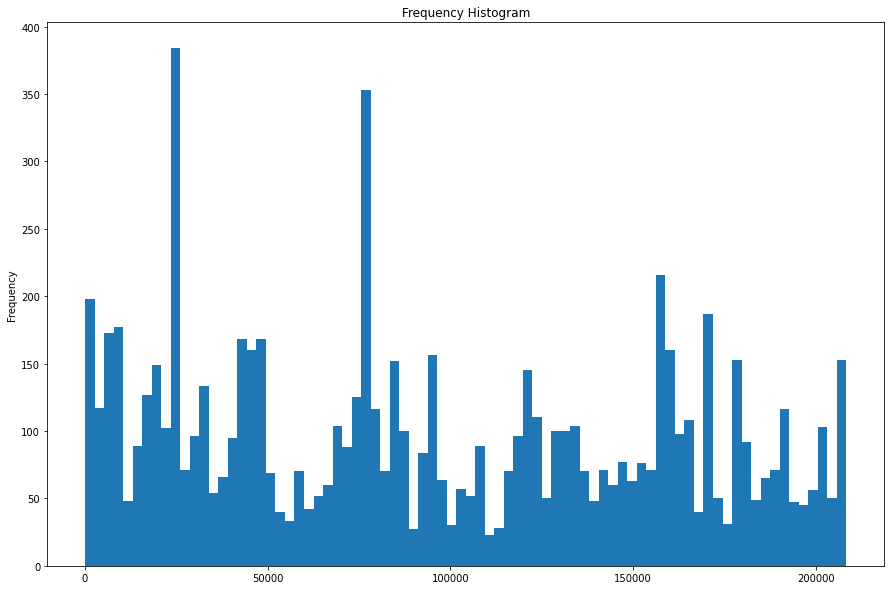

min: 79.0
max: 208330.0
median: 85957.5
average: 94795.26119592875
percentile: 195629.0

nft-metadata-reader/ipfs_metadata_gauge.csv


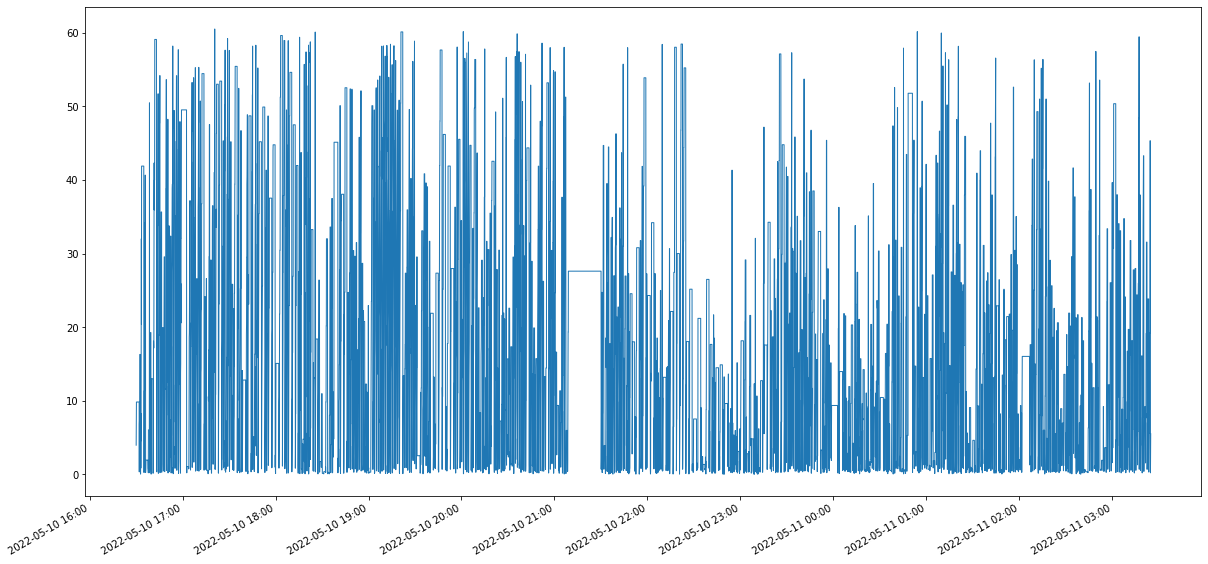

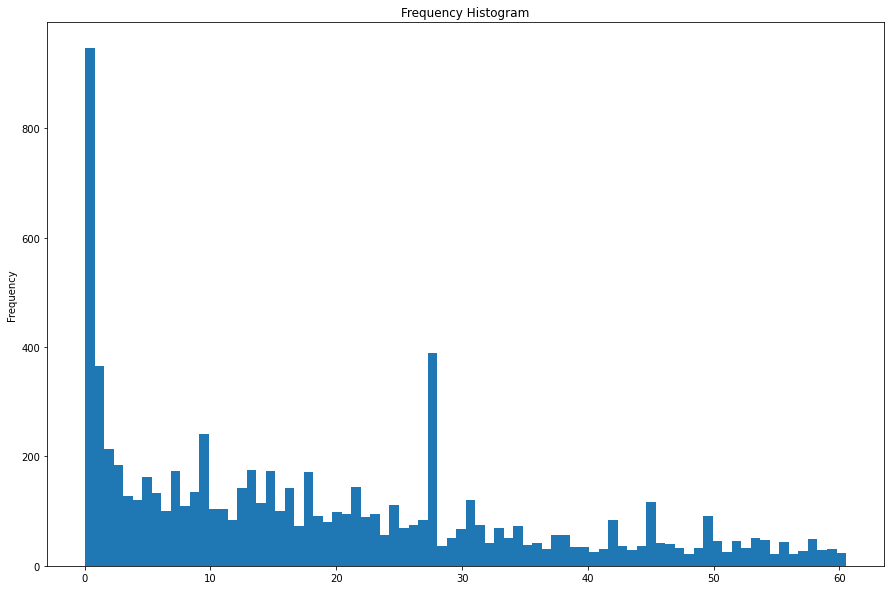

min: 0.040033493
max: 60.521996499
median: 15.524577001499999
average: 19.02308563575814
percentile: 51.796533917

nft-metadata-reader/on_chain_metadata_count.csv


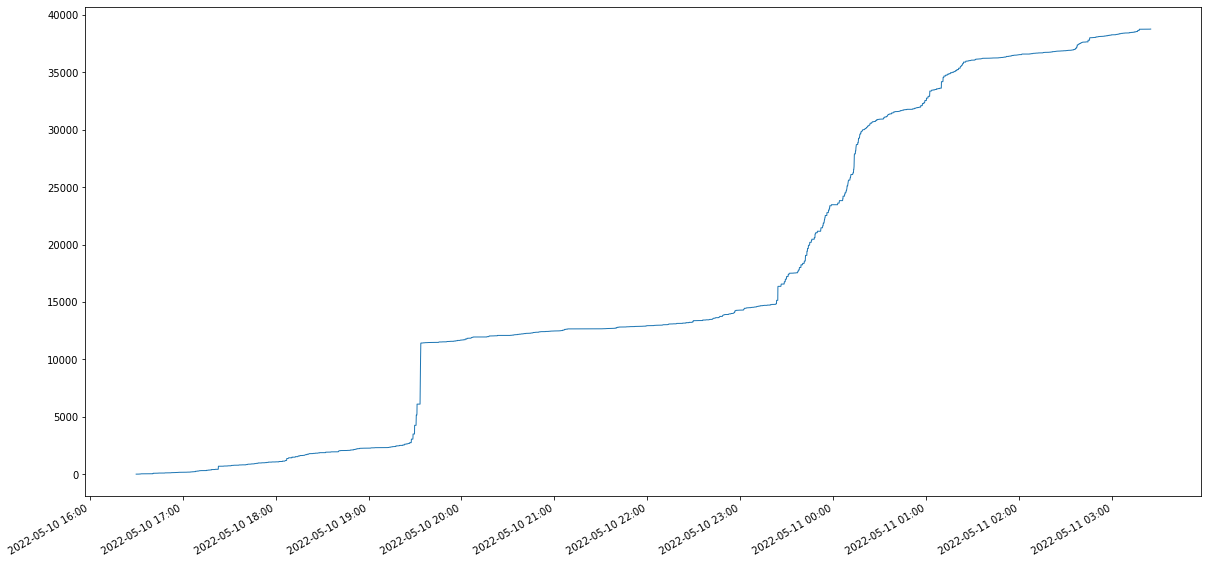

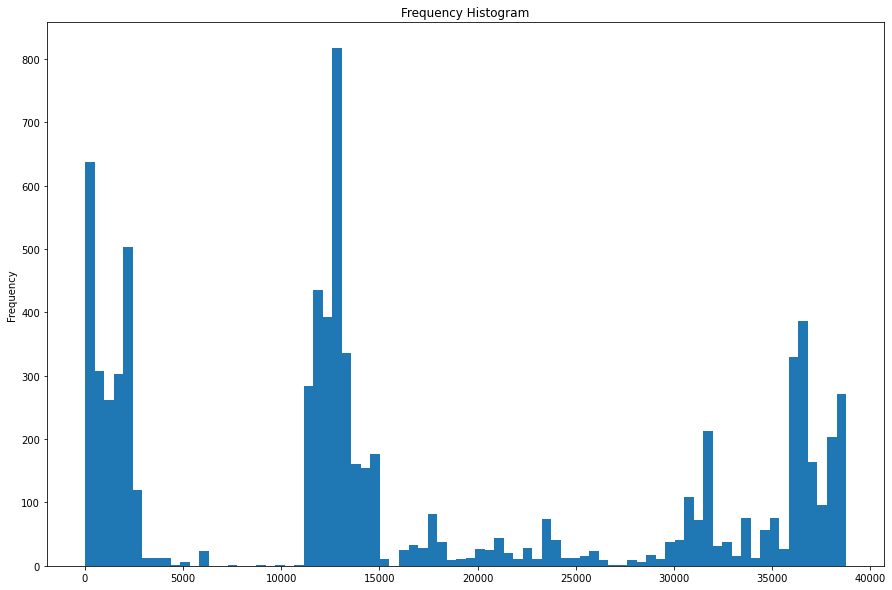

min: 10.0
max: 38774.0
median: 12893.0
average: 16782.242493638678
percentile: 38128.0

nft-metadata-reader/on_chain_metadata_gauge.csv


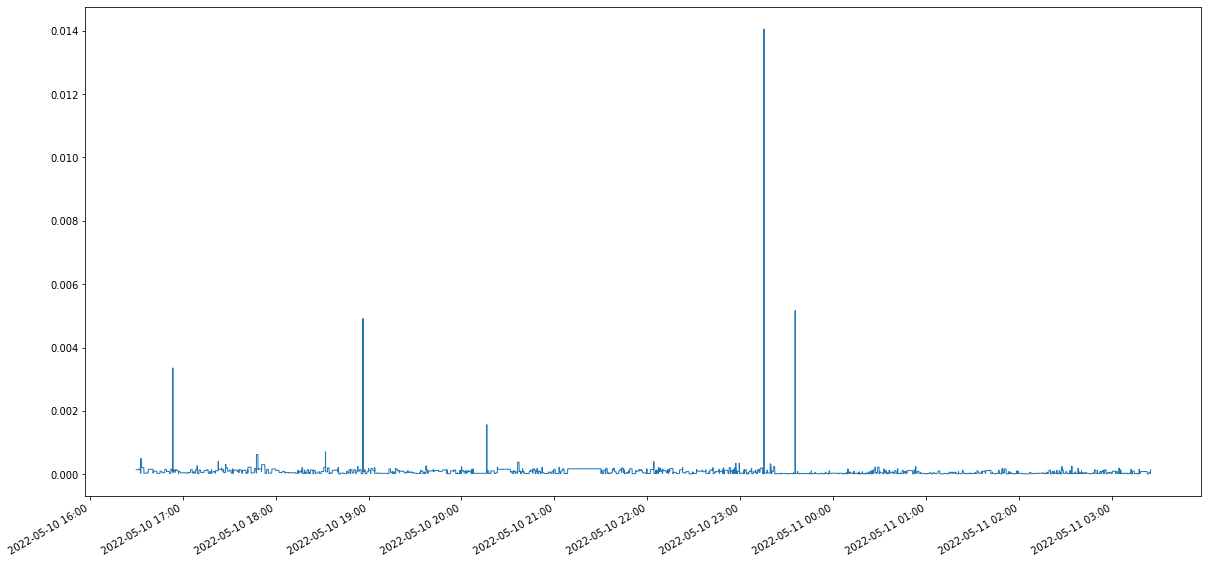

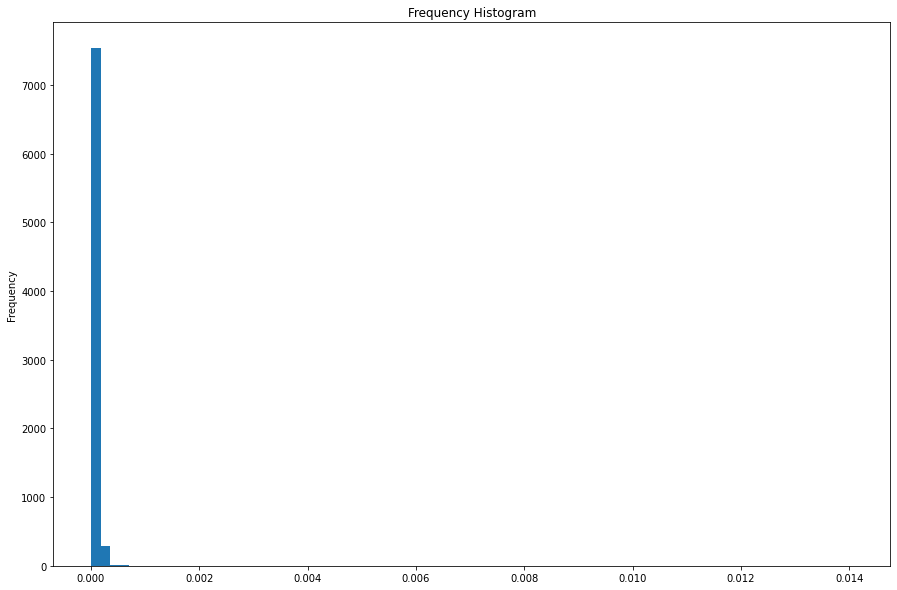

min: 6.868e-06
max: 0.014053368
median: 5.0228e-05
average: 8.03295923664122e-05
percentile: 0.000174845

nft-metadata-reader/processed_metadata_gauge.csv


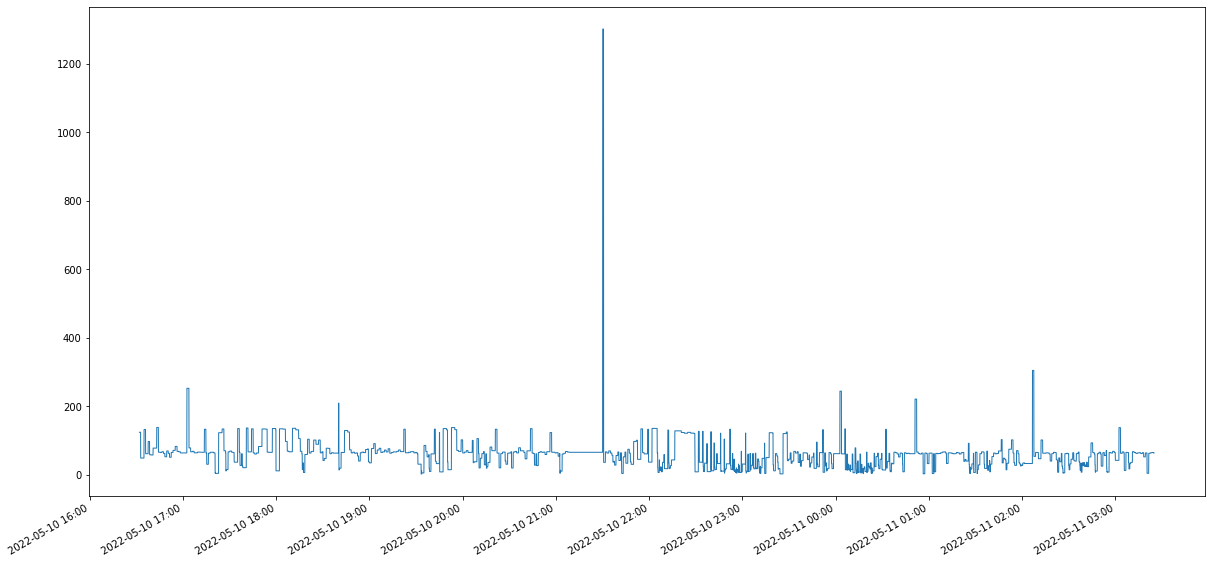

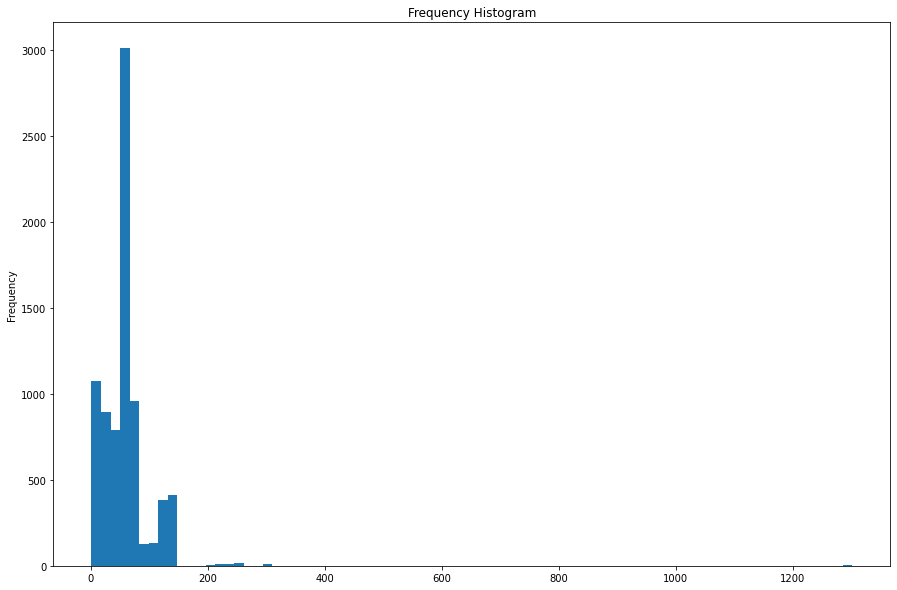

min: 1.6978362040000001
max: 1301.650577887
median: 63.04225944
average: 60.752561322153014
percentile: 133.120305011

Per token estimation for AVG(seconds): 0.060752561322153016
Per token estimation fo(seconds): 0.133120305011



In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as md

def average(metric, from_date = datetime(1970,1,1), to_date = datetime.now()):
    print(metric)
    with open("./csv/"+metric) as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        dates = []
        values = []
        dist = set()
        for row in reader:
            splitted = row[0].split(",")
            
            date = datetime.fromtimestamp(float(splitted[1]))
            if from_date > date:
                continue
                
            if date > to_date:
                continue
                
            val = float(splitted[2])
            if val == 0:
                continue
            
#             if val not in dist:
            dist.add(val)

            values.append(val)
            dates.append(date)
            
            
        plt.figure(figsize=(20, 10))
        plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d %H:%M'))
        plt.gca().xaxis.set_major_locator(md.HourLocator(interval = 1))
        plt.plot(dates, values, linewidth=1)
        plt.gcf().autofmt_xdate()
        plt.show()
        
        plt.figure(figsize=(15, 10))
        plt.hist(values, bins=80)
        plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
        plt.show()

        min1 = np.min(np.array(values))
        print("min:", min1)
        max1 = np.max(np.array(values))
        print("max:", max1)
        median = np.median(np.array(values))
        print("median:", median)
        
        av = np.average(np.array(values))
        print("average:", av)

        p95 = np.percentile(np.array(values), 95) # return 95th percentile.
        print("percentile:", p95)
        
        return [min1, max1, av, p95]

# values for filter by date (year, month, day, hour, min, sec).
d_from = datetime(2000,5,10,19,45,59) # date from.
d_to = datetime(2022,5,11,3,24,59)   # date to.

print("nft-events-reader")
average("nft-events-reader/block_counter.csv", d_from, d_to)
print()
ft = average("nft-events-reader/fetch_events_gauge.csv", d_from, d_to)
print()
te = average("nft-events-reader/total_events_gauge.csv", d_from, d_to)
print()

print("ETH estimation for AVG(days):", 15000000 / 30 * te[2] / 60 / 60 / 24)
print("ETH estimation for 95p(days):", 15000000 / 30 * te[3] / 60 / 60 / 24)
print()

print("nft-indexer")
average("nft-indexer/block_counter.csv", d_from, d_to)
print()
bt = average("nft-indexer/processed_block_gauge.csv", d_from, d_to)
print()
average("nft-indexer/fetch_events_gauge.csv", d_from, d_to)
print()

average("nft-indexer/tokens_gauge.csv", d_from, d_to)
print()
average("nft-indexer/fetch_uri_gauge.csv", d_from, d_to)
print()
average("nft-indexer/stored_erc721_token_counter.csv", d_from, d_to)
print()
average("nft-indexer/stored_erc1155_token_counter.csv", d_from, d_to)
print()

print("ETH estimation for AVG(days):", 15000000 / 30 * bt[2] / 60 / 60 / 24)
print("ETH estimation for 95p(days):", 15000000 / 30 * bt[3] / 60 / 60 / 24)
print()

print("nft-metadata-reader")
average("nft-metadata-reader/token_counter.csv", d_from, d_to)
print()
average("nft-metadata-reader/metadata_counter.csv", d_from, d_to)
print()
average("nft-metadata-reader/http_metadata_count.csv", d_from, d_to)
print()
average("nft-metadata-reader/http_metadata_gauge.csv", d_from, d_to)
print()
average("nft-metadata-reader/ipfs_metadata_count.csv", d_from, d_to)
print()
average("nft-metadata-reader/ipfs_metadata_gauge.csv", d_from, d_to)
print()
average("nft-metadata-reader/on_chain_metadata_count.csv", d_from, d_to)
print()
average("nft-metadata-reader/on_chain_metadata_gauge.csv", d_from, d_to)
print()
mt = average("nft-metadata-reader/processed_metadata_gauge.csv", d_from, d_to)
print()
print("Per token estimation for AVG(seconds):", mt[2] / 1000)
print("Per token estimation fo(seconds):", mt[3] / 1000)
print()